## Heart Disease Prediction Using 9 Models


#### INSPIRATION OF THE PROJECT

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using 9 models([LOGISTIC REGRESSION,KNN, NB,SVM, Random Forest, Decision Tree, XGBoost, GradientBoosting, AdaBoost]).

#### About Dataset (Meta data)

Context

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

#### Content

Column Descriptions:

      1. id(Unique id for each patient)
      2. age (Age of the patient in years)
      3. origin (place of study)
      4. sex (Male/Female)
      5. cp chest pain type
            a. typical angina.
            b. atypical angina.
            c. non-anginal.
            d. asymptomatic.
      6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
      7. chol (serum cholesterol in mg/dl)
      8. fbs (if fasting blood sugar > 120 mg/dl)
      9. restecg (resting electrocardiographic results)
      10. -- Values: [normal, stt abnormality, lv hypertrophy]
      11. thalach: maximum heart rate achieved
      12. exang: exercise-induced angina (True/ False)
      13. oldpeak: ST depression induced by exercise relative to rest
      14. slope: the slope of the peak exercise ST segment
      15. ca: number of major vessels (0-3) colored by fluoroscopy
      16. thal:[normal; fixed defect; reversible defect]
      17. num: the predicted attribute

#### Acknowledgements

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Relevant Papers:

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Citation Request:

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.

They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

#### Aims & Objectives
we will fill this after some exploratory data analysis
Import Libraries
lets start the project by importing all the libraries that we will need in the project.

### Step 1 : Import Libraries

In [3]:
#import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# 2.To vizulize the data 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap

# 3. to preprocess the data
from sklearn.preprocessing import SplineTransformer, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# 6. For Classification task.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestRegressor
from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

# 8. Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


### Step 2 : Load the dataset

In [4]:
df = pd.read_csv("datasets\heart_disease_uci.csv")

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Exploratory Data Analysis (EDA)
#### Explore Each Column

In [5]:
# Exploring the dtaa type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
# Checking the data shape
df.shape

(920, 16)

In [7]:
# Id column
print(f"Min id is : {df['id'].min()} and mix is : {df['id'].max()}")

Min id is : 1 and mix is : 920


In [8]:
# age column
print(f"Minimum age is : {df['age'].min()} and Maximum is : {df['age'].max()}")

Minimum age is : 28 and Maximum is : 77


### Step 3 Visualization

In [9]:
# Lets summerize the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

No missing values in the column so we are good to go...


<Axes: xlabel='age', ylabel='Count'>

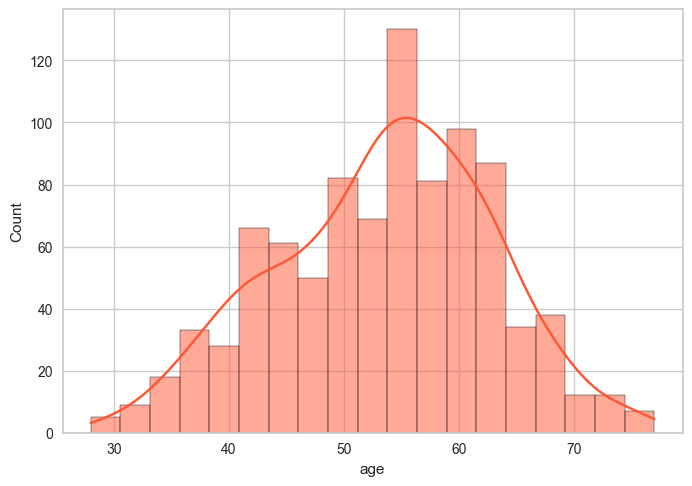

In [10]:
import seaborn as sns

# Define custom colors
custom_colors = ["#FF5733", "#3366FF", "#33FF57"] 

# plot the histogram with custom colors
sns.histplot(df['age'], kde=True, color="#FF5733", palette=custom_colors)

In [11]:
print((df['age'] == 30).sum())                  # to know the particular
# or
print(df[df['age'] == 35 ].shape[0])

1
11


The age column distribution seems to be normaly distributed because we can clearly see the bill curve.

Mean is :  53.51086956521739
Median is :  54.0
Mode is :  0    54
Name: age, dtype: int64


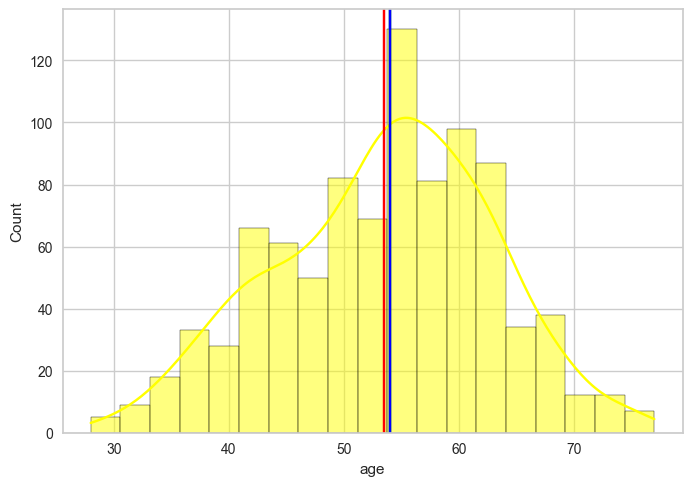

In [12]:
# Plot the mean, median, mode of age column usnig sns 
sns.histplot(df['age'], kde=True, color="Yellow")
plt.axvline(df['age'].mean(), color = "Red")
plt.axvline(df['age'].median(), color= "Green")
plt.axvline(df['age'].mode()[0], color = "Blue")

# Print the value of the mean, medain, mode of the age column
print("Mean is : ", df['age'].mean())
print("Median is : ", df['age'].median())
print("Mode is : ", df['age'].mode())

Lets explore the gender base distribution of the dataset for age column

In [13]:
# plot the histogram of the age column usnig ploty and coloring this by sex

fig =  px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [14]:
# Find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [15]:
# Case 1: Count Females below age 50
print("Female age below 50 : ", df[(df['sex'] == "Female")& (df['age'] < 50)].shape[0])

# Case 2: See Data of Females below 50
print(df[(df['sex'] == "Female") & (df['age'] < 50 )])

Female age below 50 :  72
      id  age     sex      dataset               cp  trestbps   chol    fbs  \
4      5   41  Female    Cleveland  atypical angina     130.0  204.0  False   
18    19   48  Female    Cleveland      non-anginal     130.0  275.0  False   
50    51   41  Female    Cleveland  atypical angina     105.0  198.0  False   
61    62   46  Female    Cleveland      non-anginal     142.0  177.0  False   
93    94   44  Female    Cleveland      non-anginal     108.0  141.0  False   
..   ...  ...     ...          ...              ...       ...    ...    ...   
559  560   47  Female      Hungary      non-anginal     135.0  248.0   True   
560  561   48  Female      Hungary     asymptomatic     138.0  214.0  False   
585  586   47  Female      Hungary     asymptomatic     120.0  205.0  False   
601  602   38  Female  Switzerland     asymptomatic     105.0    0.0    NaN   
602  603   38  Female  Switzerland     asymptomatic     110.0    0.0  False   

            restecg  thal

In [16]:
# Case 3 : COunt by gender for Age < 50

print(df[df['age'] < 50 ]['sex'].value_counts())

sex
Male      220
Female     72
Name: count, dtype: int64


In [17]:
# Rough work but important  :)

# # male_count = df[df['sex'] == 'Male'].sum()
# print(df[(df['sex'] == "Male")].sum())

male_count = df['sex'] == "Male"
print(male_count.sum())
# print(male_count)
male_co = (df['sex'] == "Male").sum()
print("Male count in shortcut is : ", male_co)
female_count = df['sex'] == "Female"
print(female_count.sum())

726
Male count in shortcut is :  726
194


In [18]:
# Calculating the percentage of male and female value counts in the data 

male_count = (df['sex'] == "Male").sum()
female_count = (df['sex'] == "Female").sum()

print("Males are : ", male_count, "and female count are : ", female_count)

total_count = male_count + female_count

# calculate Percentage
male_percentage =  (male_count/total_count)*100
female_percentage = (female_count/total_count)*100

# display the result
print(f"Male percentage in the data : {male_percentage:.2f}%")
print(f"Female percentage in the data : {female_percentage:.2f}%")

# Differences 
differences_percentage = ((male_count - female_count)/female_count)*100

print(f"Males are {differences_percentage:.2f}% more than females in the data.")

Males are :  726 and female count are :  194
Male percentage in the data : 78.91%
Female percentage in the data : 21.09%
Males are 274.23% more than females in the data.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [20]:
# Find the values count of the age column grouping by age column 
df.groupby('age')['age'].value_counts()

age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    22
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    43
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64

In [21]:
# Find the values count of the age column grouping by sex column 
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

### Step 4 : Exploring dataset columns

In [22]:
# Find the unique values in the datasets columns
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [23]:
# Plot the countplot of dataset column

fig = px.bar(df, x ='dataset', color='sex')
fig.show()

# Print the value of the dataset columns groups by sex
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [29]:
# Make a plot of the age column usnig ploty and coloring by datasets

fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# Print the mean median and mode of the age column by dataset column
print("--------------------------------------------------------")
print("Mean of the dataset : ", df.groupby('dataset')['age'].mean())
print("--------------------------------------------------------")
print("Median of the dataset : ", df.groupby('dataset')['age'].median())
print("--------------------------------------------------------")
print("Mode of the dataset : ", df.groupby('dataset')['age'].agg(pd.Series.mode))


--------------------------------------------------------
Mean of the dataset :  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
--------------------------------------------------------
Median of the dataset :  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
--------------------------------------------------------
Mode of the dataset :  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


## Step 5 : Exploring CP (Chest Pain) Column

In [30]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

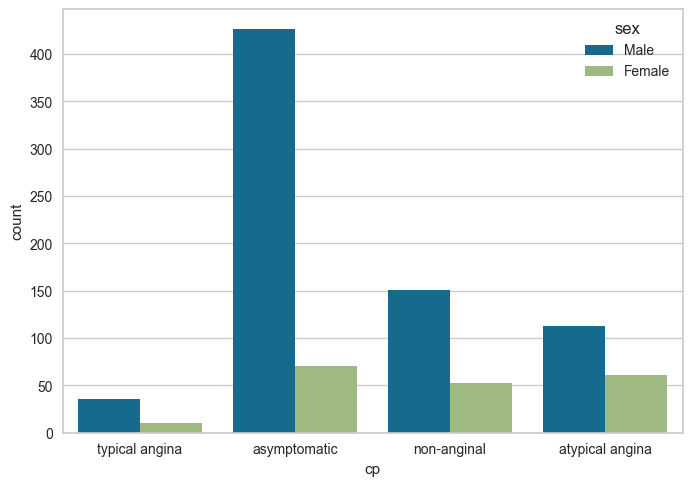

In [31]:
# count plot of cp column by sex column 
sns.countplot(df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

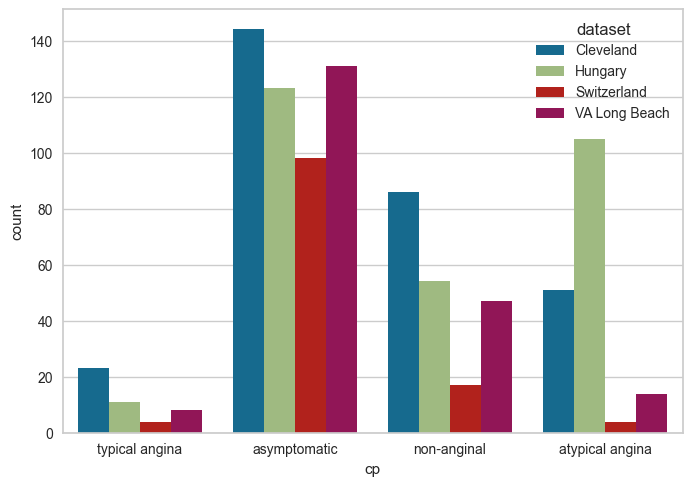

In [32]:
# count plot of cp column by dataset column
sns.countplot(df, x='cp', hue='dataset')

In [34]:
# Draw the plot of age column group by cp column

fig = px.histogram(data_frame=df , x='age', color='cp')
fig.show()

Let's explore the trestbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.\ Write here, what will happen if the blood pressure is high or low and then you canbin the data based on the those values.

In [36]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [37]:
df['trestbps'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: trestbps
Non-Null Count  Dtype  
--------------  -----  
861 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


##### Handling missing values in trestbps column

##### There are some missing values becuase total values is 920 but here we have 861

In [40]:
# Dealing with Missing values in trestbp column
# Find the percentage of missing values in trestbps column

print(f"Percentage of missing values in trestbps column : {df['trestbps'].isnull().sum() / len(df)*100:.2f}%")



Percentage of missing values in trestbps column : 6.41%


##### Removing missing values using Iterative imputer

In [45]:
# Impute the missing values of trestbps  column lunsig iterative imputer

# Create an object on trestbps column
imputer1 = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer o trestbps column
imputer1.fit(df[['trestbps']])

# Transform the data 
df['trestbps'] = imputer1.transform(df[['trestbps']])

# Check the missing values in trestbps column
print(f"Missing values in trestbps columns : {df['trestbps'].isnull().sum()}")

Missing values in trestbps columns : 0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
